In [1]:
import os

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"   # For GPU

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
model = keras.models.load_model("model128x128/unet_model_upsampling_128x128.hdf5")

In [4]:
data_path = "../../data/Brats2018/"

imgs128x128 = np.load(os.path.join(data_path, "128x128/imgs_test.npy"), mmap_mode="r", allow_pickle=False)
msks128x128 = np.sum(np.load(os.path.join(data_path, "128x128/msks_test.npy"), mmap_mode="r", allow_pickle=False), axis=-1)

imgs240x240 = np.load(os.path.join(data_path, "240x240/imgs_test.npy"), mmap_mode="r", allow_pickle=False)
msks240x240 = np.sum(np.load(os.path.join(data_path, "240x240/msks_test.npy"), mmap_mode="r", allow_pickle=False), axis=-1)


In [7]:
pred128x128 = model.predict(np.expand_dims(imgs128x128[:,:,:,2], -1), verbose=1)

6635/6635 [==============================] - 300s 45ms/step


In [8]:
pred240x240 = model.predict(np.expand_dims(imgs240x240[:,:,:,2], -1), verbose=1)

6635/6635 [==============================] - 584s 88ms/step


In [11]:
def compare_predictions(img128x128, msk128x128, pred128x128, img240x240, msk240x240, pred240x240):
    
    plt.figure(figsize=(14,14))
    
    plt.subplot(2,3,1)
    plt.imshow(img128x128)
    plt.title("MRI 128x128 (crop)")
    plt.subplot(2,3,2)
    plt.imshow(msk128x128)
    plt.title("Mask 128x128 (crop)")
    plt.subplot(2,3,3)
    plt.imshow(pred128x128)
    plt.title("Prediction 128x128 (crop)")
    
    plt.subplot(2,3,4)
    plt.imshow(img240x240)
    plt.title("MRI 240x240")
    plt.subplot(2,3,5)
    plt.imshow(msk240x240)
    plt.title("Mask 240x240")
    plt.subplot(2,3,6)
    plt.imshow(pred240x240)
    plt.title("Prediction 240x240")
    

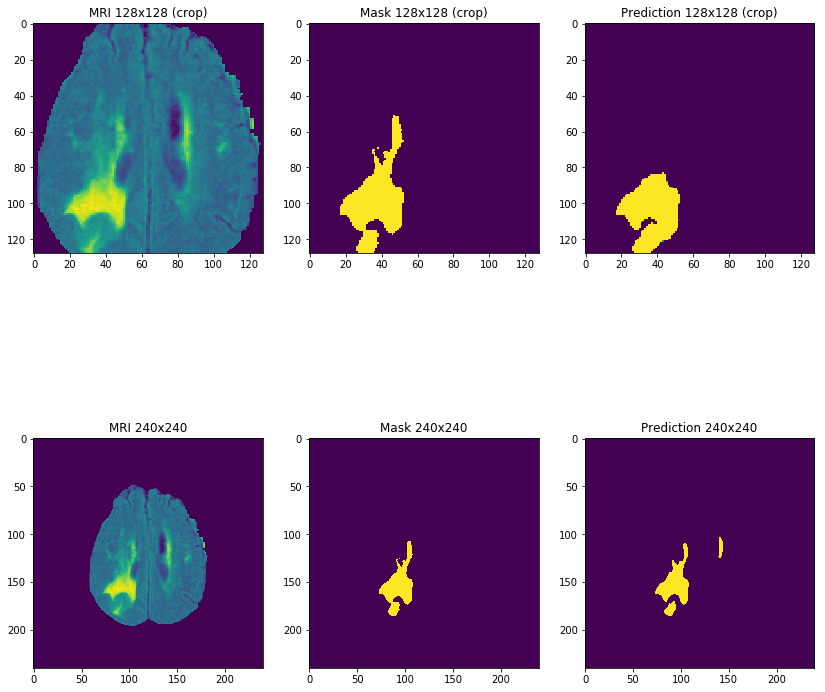

In [14]:
idx = 800   # 200, 500, 800, 1100, 1200, 1800, 2000, 2300    # 500, 800, 1100, 2300 is a very good example  #900, 1900 is counter-example
compare_predictions(imgs128x128[idx,:,:,2], msks128x128[idx,:,:], pred128x128[idx,:,:,0], 
                    imgs240x240[idx,:,:,2], msks240x240[idx,:,:], pred240x240[idx,:,:,0])

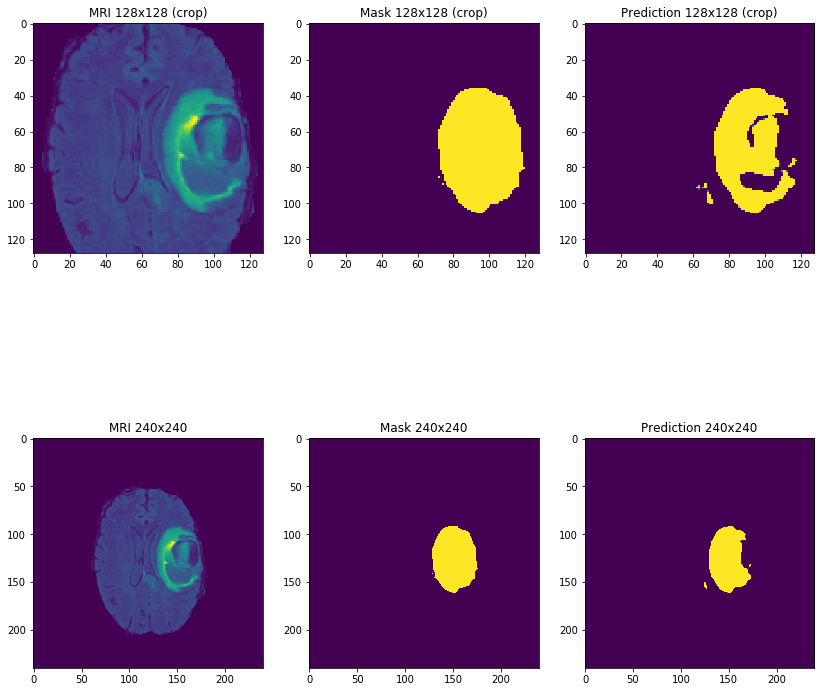

In [15]:
idx = 1100   # 200, 500, 800, 1100, 1200, 1800, 2000, 2300    # 500, 800, 1100, 2300 is a very good example  #900, 1900 is counter-example
compare_predictions(imgs128x128[idx,:,:,2], msks128x128[idx,:,:], pred128x128[idx,:,:,0], 
                    imgs240x240[idx,:,:,2], msks240x240[idx,:,:], pred240x240[idx,:,:,0])

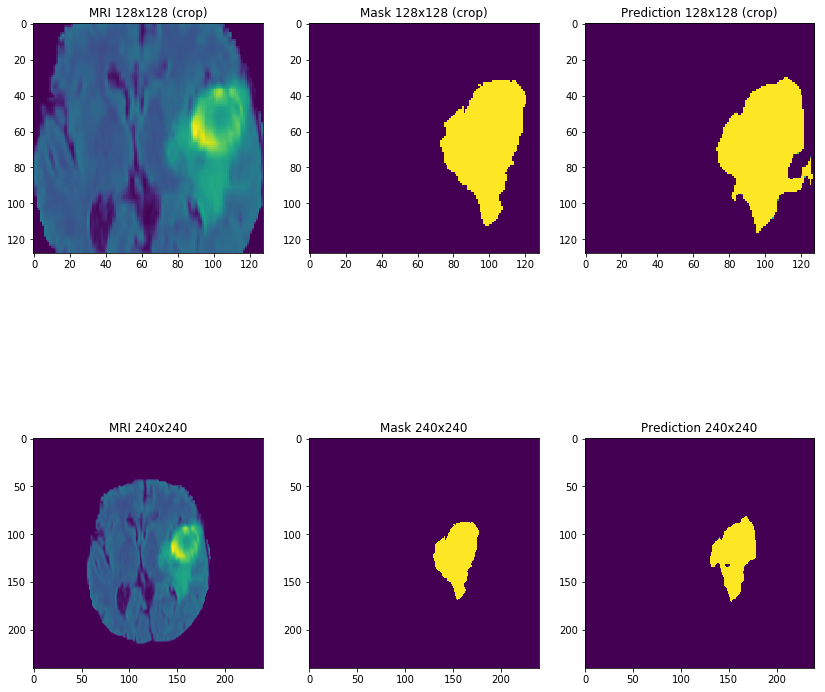

In [16]:
idx = 1200   # 200, 500, 800, 1100, 1200, 1800, 2000, 2300    # 500, 800, 1100, 2300 is a very good example  #900, 1900 is counter-example
compare_predictions(imgs128x128[idx,:,:,2], msks128x128[idx,:,:], pred128x128[idx,:,:,0], 
                    imgs240x240[idx,:,:,2], msks240x240[idx,:,:], pred240x240[idx,:,:,0])

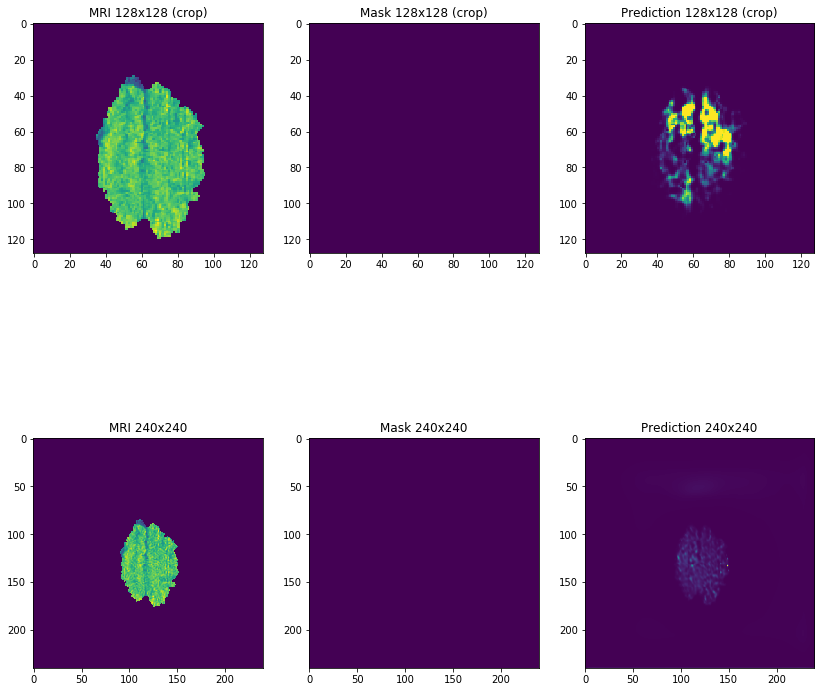

In [21]:
idx = 3000   # 200, 500, 800, 1100, 1200, 1800, 2000, 2300    # 500, 800, 1100, 2300 is a very good example  #900, 1900 is counter-example
compare_predictions(imgs128x128[idx,:,:,2], msks128x128[idx,:,:], pred128x128[idx,:,:,0], 
                    imgs240x240[idx,:,:,2], msks240x240[idx,:,:], pred240x240[idx,:,:,0])

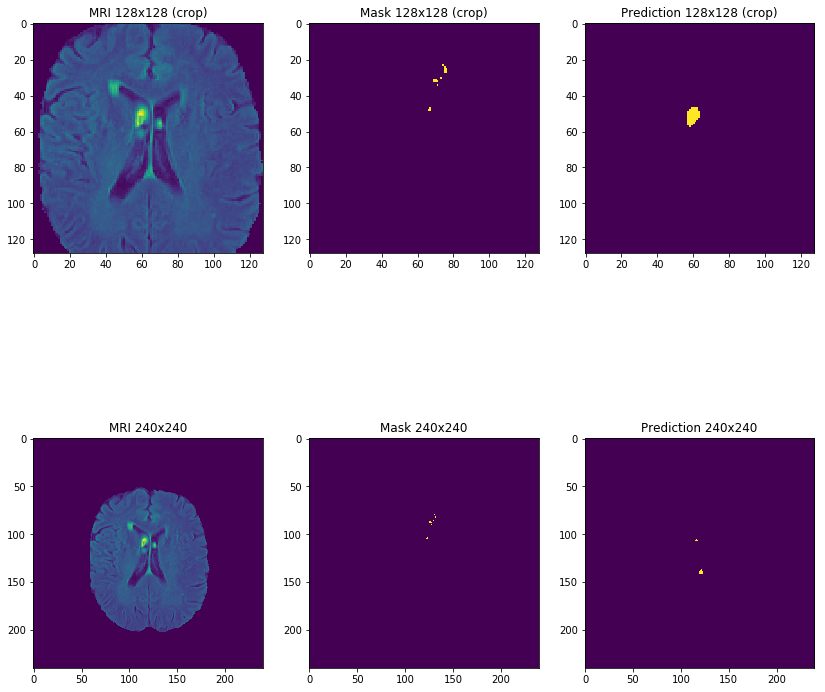

In [31]:
idx = 3850   # 200, 500, 800, 1100, 1200, 1800, 2000, 2300    # 500, 800, 1100, 2300 is a very good example  #900, 1900 is counter-example
compare_predictions(imgs128x128[idx,:,:,2], msks128x128[idx,:,:], pred128x128[idx,:,:,0], 
                    imgs240x240[idx,:,:,2], msks240x240[idx,:,:], pred240x240[idx,:,:,0])

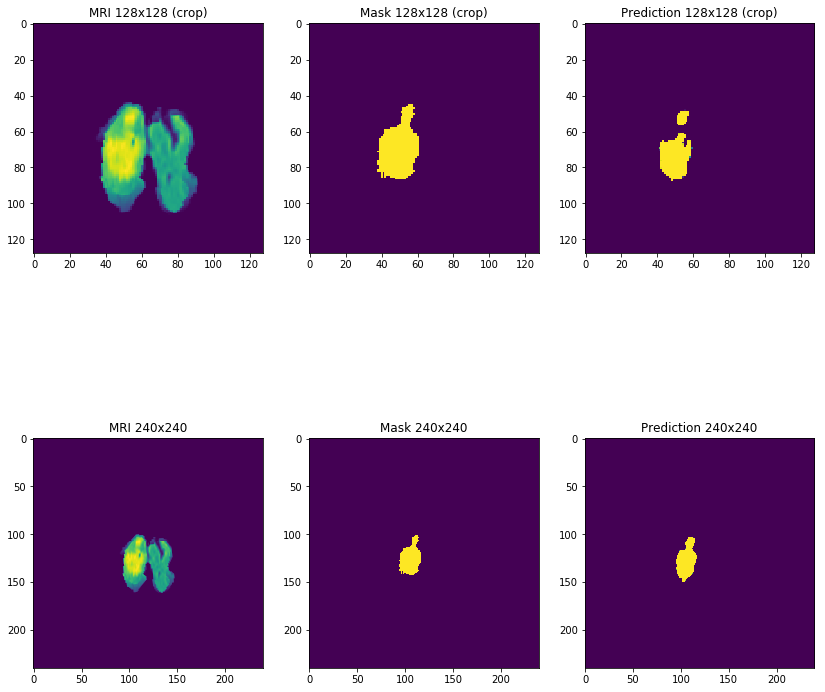

In [38]:
idx = 990   # 200, 500, 800, 1100, 1200, 1800, 2000, 2300    # 500, 800, 1100, 2300 is a very good example  #900, 1900 is counter-example
compare_predictions(imgs128x128[idx,:,:,2], msks128x128[idx,:,:], pred128x128[idx,:,:,0], 
                    imgs240x240[idx,:,:,2], msks240x240[idx,:,:], pred240x240[idx,:,:,0])

1/1 [==============================] - 0s 449ms/step


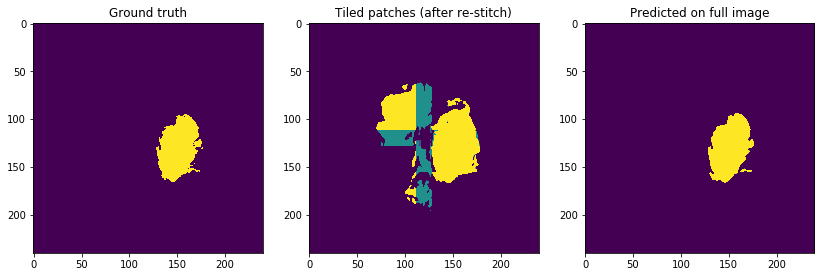

In [103]:
idx = 2371  # 200, 500, 800, 1100, 1200, 1800, 2000, 2300, 2371, 4154, 5550    # 500, 800, 1100, 2300 is a very good example  #900, 1900
p0 = model.predict(np.expand_dims(imgs240x240[idx:(idx+1),0:128,0:128,2], -1), verbose=1)
p1 = model.predict(np.expand_dims(imgs240x240[idx:(idx+1),0:128,112:240,2], -1), verbose=1)
p2 = model.predict(np.expand_dims(imgs240x240[idx:(idx+1),112:240,0:128,2], -1), verbose=1)
p3 = model.predict(np.expand_dims(imgs240x240[idx:(idx+1),112:240,112:240,2], -1), verbose=1)

f = model.predict(np.expand_dims(imgs240x240[idx:(idx+1),:,:,2], -1), verbose=1)

combined = np.zeros((240,240))
scaled = np.zeros((240,240))

combined[0:128,0:128] += p0[0,:,:,0]
combined[0:128,112:240] += p1[0,:,:,0]
combined[112:240,0:128] += p2[0,:,:,0]
combined[112:240,112:240] += p3[0,:,:,0]

# Add patches with only 1s to scale the overlaps properly
scaled[0:128,0:128] += np.ones((128,128))
scaled[0:128,112:240] += np.ones((128,128))
scaled[112:240,0:128] += np.ones((128,128))
scaled[112:240,112:240] += np.ones((128,128))

combined = combined * 1.0 / scaled

plt.figure(figsize=(14,14));
plt.subplot(1,3,1);
plt.imshow(msks240x240[idx,:,:]);
plt.title("Ground truth");
plt.subplot(1,3,2);
plt.imshow(combined);
plt.title("Tiled patches (after re-stitch)");
plt.subplot(1,3,3);
plt.imshow(f[0,:,:,0]);
plt.title("Predicted on full image");

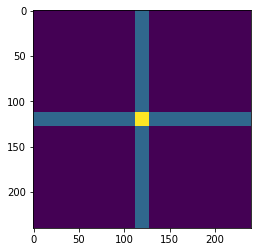

In [104]:
plt.imshow(scaled)